#Essential Library

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
!pip install tensorflow_text
import tensorflow_text as text

#BERT

In [41]:
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [42]:
bert_preprocess_model = hub.KerasLayer(preprocess_url)

In [43]:
text_test = ['nice movie indeed', 'I love python programming']
text_preprocessed = bert_preprocess_model(text_test)
text_preprocessed

{'input_mask': <tf.Tensor: shape=(2, 128), dtype=int32, numpy=
 array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
       dtype=int32)>,
 'input_type_ids': <tf.Tensor: shape

In [44]:
text_preprocessed.keys()

dict_keys(['input_word_ids', 'input_type_ids', 'input_mask'])

In [45]:
text_preprocessed['input_mask'] # CLS NICE MOVIE INDEED SPE -> 5 Tokens   ; 128 MAX SIZE (padded)

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int32)>

In [46]:
text_preprocessed['input_word_ids'] # CLS(101) NICE MOVIE INDEED SPE -> 5 Tokens

<tf.Tensor: shape=(2, 128), dtype=int32, numpy=
array([[  101,  3835,  3185,  5262,   102,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0, 

In [47]:
bert_model = hub.KerasLayer(encoder_url)
bert_results = bert_model(text_preprocessed) #Give the word embeddings
bert_results.keys()

dict_keys(['sequence_output', 'encoder_outputs', 'pooled_output', 'default'])

In [48]:
bert_results['pooled_output'] #Embeddings for entire sentence

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7917739 , -0.21411909,  0.4976954 , ...,  0.24465227,
        -0.47334474,  0.81758684],
       [-0.9171232 , -0.4793518 , -0.78656995, ..., -0.61751765,
        -0.7102687 ,  0.92184305]], dtype=float32)>

In [49]:
bert_results['sequence_output'] #Embeddings for EACH WORD
#nice movie indeed -> length is 128 and for each word embedding is of size 768

<tf.Tensor: shape=(2, 128, 768), dtype=float32, numpy=
array([[[ 0.0729205 ,  0.08567805,  0.14476834, ..., -0.09677093,
          0.08722132,  0.07711114],
        [ 0.17839366, -0.19006063,  0.5034938 , ..., -0.05869829,
          0.32717124, -0.15578608],
        [ 0.18701442, -0.4338877 , -0.48875114, ..., -0.15502742,
          0.00145208, -0.24470937],
        ...,
        [ 0.12083051,  0.12884271,  0.46453524, ...,  0.07375547,
          0.17441954,  0.16522135],
        [ 0.07967868, -0.01190664,  0.502254  , ...,  0.1377777 ,
          0.21002208,  0.00624589],
        [-0.07212722, -0.28303432,  0.59033346, ...,  0.4755192 ,
          0.1666851 , -0.08920341]],

       [[-0.07900561,  0.36335143, -0.21101603, ..., -0.17183733,
          0.16299734,  0.6724263 ],
        [ 0.27883607,  0.43716288, -0.35764828, ..., -0.0446361 ,
          0.38315198,  0.58879817],
        [ 1.2037672 ,  1.0727026 ,  0.4840874 , ...,  0.24921   ,
          0.40730882,  0.4048173 ],
        ...,

In [50]:
len(bert_results['encoder_outputs']) #Embeddings result for each encoder output ; above encoder is 12 layered

#LAST Layer output is same as Sequence Output
bert_results['encoder_outputs'][-1] == bert_results['sequence_output']

<tf.Tensor: shape=(2, 128, 768), dtype=bool, numpy=
array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]]])>

#Downstream Task using BERT

In [51]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/47_BERT_text_classification/spam.csv')
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [52]:
df.groupby('Category').describe() #There is some imbalance in dataset

Message                                                               
           count unique                                                top freq
Category                                                                       
ham         4825   4516                             Sorry, I'll call later   30
spam         747    641  Please call our customer service representativ...    4

In [53]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [54]:
747/4825

0.15481865284974095

In [55]:
df_spam = df[df['Category'] == 'spam']
df_spam.shape

(747, 2)

In [56]:
df_ham = df[df['Category'] == 'ham']
df_ham.shape

(4825, 2)

In [57]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [58]:
df_balanced  = pd.concat([df_spam, df_ham_downsampled])
df_balanced.shape

(1494, 2)

In [59]:
df_balanced['Category'].value_counts()

ham     747
spam    747
Name: Category, dtype: int64

In [60]:
df_balanced.head()

,Category,Message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [61]:
df_balanced['spam'] = df_balanced['Category'].apply(lambda x: 1 if x == 'spam' else 0)
df_balanced.sample(5)

,Category,Message,spam
2774,spam,How come it takes so little time for a child w...,1
3742,spam,2/2 146tf150p,1
3828,spam,Congratulations U can claim 2 VIP row A Ticket...,1
3132,spam,LookAtMe!: Thanks for your purchase of a video...,1
296,spam,T-Mobile customer you may now claim your FREE ...,1


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_balanced['Message'], df_balanced['spam'], stratify = df_balanced['spam'])

In [63]:
X_train.head()

3486    No:-)i got rumour that you going to buy apartm...
5513    Yes. Please leave at  &lt;#&gt; . So that at  ...
4879    No 1 POLYPHONIC tone 4 ur mob every week! Just...
3301                  Just do what ever is easier for you
3010    Update_Now - 12Mths Half Price Orange line ren...
Name: Message, dtype: object

In [64]:
# preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
# encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

# bert_preprocess_model = hub.KerasLayer(preprocess_url)
# bert_model = hub.KerasLayer(encoder_url)

In [65]:
def get_sentence_embedding(sentences):
    preprocessed_text = bert_preprocess_model(sentences)
    return bert_model(preprocessed_text)['pooled_output']

get_sentence_embedding(['this is sentence 1', 'followed up another text'])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.80671316, -0.10140578,  0.7551335 , ...,  0.30465567,
        -0.45456758,  0.8252338 ],
       [-0.6998074 , -0.2004927 ,  0.3374719 , ...,  0.36983138,
        -0.51954985,  0.8156409 ]], dtype=float32)>

In [66]:
e = get_sentence_embedding(['banana', 'apple', 'elon musk', 'bill gates'])
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]], [e[1]]), cosine_similarity([e[0]], [e[2]]), cosine_similarity([e[2]], [e[3]])

(array([[0.9659778]], dtype=float32),
 array([[0.8933625]], dtype=float32),
 array([[0.916415]], dtype=float32))

In [67]:
#Functional

#BERT Layers
text_input = tf.keras.layers.Input(shape = (), dtype = tf.string, name = 'text')
preprocessed_text = bert_preprocess_model(text_input)
outputs = bert_model(preprocessed_text)

#Neural Network Layers
l = tf.keras.layers.Dropout(0.1, name = 'dropout')(outputs['pooled_output'])
l = tf.keras.layers.Dense(1, activation = 'sigmoid', name = 'output')(l)

#Final Model
model = tf.keras.Model(inputs = [text_input], outputs = [l])

In [67]:
model.summary()

In [68]:
METRICS = [tf.keras.metrics.BinaryAccuracy(name = 'accuracy'), tf.keras.metrics.Precision(name = 'precision'), tf.keras.metrics.Recall(name = 'recall')]

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = METRICS)

In [69]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
35/35 [==============================] - 26s 277ms/step - loss: 0.6456 - accuracy: 0.6286 - precision: 0.6374 - recall: 0.5964
Epoch 2/10
35/35 [==============================] - 8s 217ms/step - loss: 0.5168 - accuracy: 0.8054 - precision: 0.7898 - recall: 0.8321
Epoch 3/10
35/35 [==============================] - 7s 208ms/step - loss: 0.4479 - accuracy: 0.8482 - precision: 0.8385 - recall: 0.8625
Epoch 4/10
35/35 [==============================] - 7s 209ms/step - loss: 0.3976 - accuracy: 0.8741 - precision: 0.8521 - recall: 0.9054
Epoch 5/10
35/35 [==============================] - 8s 227ms/step - loss: 0.3668 - accuracy: 0.8848 - precision: 0.8646 - recall: 0.9125
Epoch 6/10
35/35 [==============================] - 10s 272ms/step - loss: 0.3432 - accuracy: 0.8946 - precision: 0.8708 - recall: 0.9268
Epoch 7/10
35/35 [==============================] - 9s 270ms/step - loss: 0.3341 - accuracy: 0.8875 - precision: 0.8861 - recall: 0.8893
Epoch 8/10
35/35 [=====================

In [70]:
model.evaluate(X_test, y_test)

12/12 [==============================] - 5s 271ms/step - loss: 0.3064 - accuracy: 0.8877 - precision: 0.8836 - recall: 0.8930


[0.3063739538192749, 0.8877005577087402, 0.8835979104042053, 0.893048107624054]

In [71]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

In [72]:
import numpy as np
y_predicted = np.where(y_predicted > 0.5, 1 , 0)
y_predicted

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,

In [73]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_predicted)
cm

array([[165,  22],
       [ 20, 167]])

Text(33.0, 0.5, 'Truth')

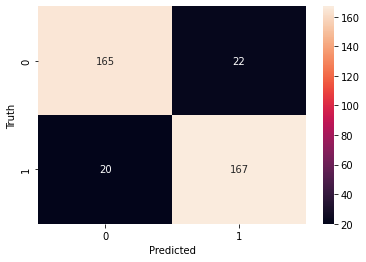

In [74]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [75]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       187
           1       0.88      0.89      0.89       187

    accuracy                           0.89       374
   macro avg       0.89      0.89      0.89       374
weighted avg       0.89      0.89      0.89       374



##Inference

In [80]:
reviews = ['Spiderman was a good movie', 'Dear Sir, Hope you are doing well. May I know the updates on the task given yesterday? Thanks and Regards GoodBoy']
model.predict(reviews)

array([[0.03044488],
       [0.40412918]], dtype=float32)